In [2]:
#!pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 166.8 kB/s eta 0:00:00


In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import lightgbm as lgb

In [64]:
#importer le dataset
Data = pd.read_csv('C:/Users/tahaj/OneDrive/Bureau/Stage/NightTimeLightCollection/preprocess_saudiarabia.csv',sep=";")
Data.head()

,Date,SOL,GDP
0,01/01/2012,5.461777e+06,5.804692e+11
1,01/04/2012,6.578292e+06,5.728170e+11
2,01/07/2012,6.034126e+06,5.760421e+11
3,01/10/2012,6.016527e+06,5.885344e+11
4,01/01/2013,6.884214e+06,5.826578e+11


In [65]:
# Prétraitement des données
# Convertir la colonne Date en une représentation numérique entière
Data['Date'] = pd.to_datetime(Data['Date'])
Data['date_int'] = Data['Date'].dt.strftime('%d%m%Y').astype(int)
Data.drop('Date', axis=1,inplace=True)

Data.head()



,SOL,GDP,date_int
0,5.461777e+06,5.804692e+11,1012012
1,6.578292e+06,5.728170e+11,4012012
2,6.034126e+06,5.760421e+11,7012012
3,6.016527e+06,5.885344e+11,10012012
4,6.884214e+06,5.826578e+11,1012013


In [66]:
# Fusionner les données SOL et GDP en fonction de l'année
Data = pd.merge(Data['SOL'], Data['GDP'], on=Data['date_int'])

In [67]:
# Séparer les données en caractéristiques (X) et étiquettes (Y)
X = Data.drop('GDP', axis=1)
Y = Data['GDP']


In [68]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [69]:
# Créer et entraîner le modèle LightGBM
reg = lgb.LGBMRegressor()
reg.fit(X_train, Y_train)

LGBMRegressor()

In [70]:
# Faire des prédictions sur les données de test
predictions = reg.predict(X_test)


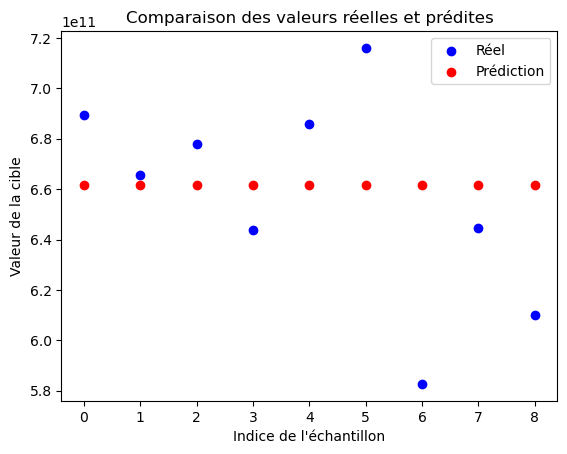

In [73]:
import matplotlib.pyplot as plt

# Tracer les valeurs réelles et prédites
plt.scatter(range(len(Y_test)), Y_test, color='b', label='Réel')
plt.scatter(range(len(Y_test)), predictions, color='r', label='Prédiction')
plt.xlabel("Indice de l'échantillon")
plt.ylabel('Valeur de la cible')
plt.title('Comparaison des valeurs réelles et prédites')
plt.legend()
plt.show()

In [71]:
# Calculer l'erreur quadratique moyenne (RMSE)
rmse = mean_squared_error(Y_test, predictions, squared=False)

print('RMSE:', rmse)

RMSE: 39580753000.87726
